### **Introduction**

This project explores the Titanic dataset, focusing on understanding survival factors and evaluating fairness in predictive modeling. By analyzing passenger data, I aimed to answer the following questions:
- What factors influenced survival on the Titanic?
- How can machine learning models predict survival outcomes effectively?
- Is the model fair across different demographic and socioeconomic groups?

### **Goals of the Project**
1. **Data Exploration and Preprocessing**:  
   I began by cleaning and transforming the Titanic dataset to ensure it was ready for analysis. This involved handling missing values, encoding categorical variables, and scaling numerical features.

2. **Predictive Modeling**:  
   Using logistic regression, I built a classification model to predict survival based on passenger features such as age, gender, class, and fare.

3. **Fairness Analysis**:  
   I conducted a fairness evaluation to assess the model’s performance across sensitive groups (e.g., gender, age, socioeconomic class). This included computing metrics like demographic parity, equal opportunity, and equalized odds.

4. **Real-World Implications**:  
   This project demonstrates the practical application of data science in addressing fairness and bias in machine learning models. Ensuring equitable outcomes is critical, especially in high-stakes scenarios.

---

### **Significance of the Project**

This analysis showcases my ability to:
- Work with real-world datasets to extract meaningful insights.
- Build machine learning models with a focus on both performance and fairness.
- Communicate findings effectively, aligning technical work with ethical considerations.

This project reflects my commitment to applying data science in ways that are impactful, equitable, and insightful. Through this personal project, I’ve combined technical rigor with thoughtful analysis to address both predictive accuracy and fairness.


# **Exploring Survival Factors in the Titanic Disaster**

In this project, I analyze the famous Titanic dataset to investigate the factors influencing survival during one of the most well-known maritime tragedies in history. The objective is to uncover patterns and relationships between passenger demographics, ticket class, and survival rates through data exploration and statistical modeling.

### Key Questions Addressed:
1. How did socioeconomic status (ticket class) impact survival likelihood?
2. Did age and gender play a significant role in survival outcomes?
3. What additional insights can we derive about the passengers and their journeys?

### Methods:
- **Data Preprocessing**: Handling missing and inconsistent data.
- **Exploratory Data Analysis (EDA)**: Identifying trends and anomalies.
- **Predictive Modeling**: Using statistical and machine learning models to predict survival probabilities.

### Personal Motivation:
Understanding survival factors in critical events like the Titanic tragedy offers valuable insights into human behavior and societal norms during crises. This project also serves as a practical application of data science techniques, including preprocessing, visualization, and predictive modeling, to derive meaningful conclusions from real-world data.


In [2]:
# --- Initialization and Imports ---
# Importing essential libraries for data manipulation, analysis, and visualization.
import numpy as np
from numpy.random import default_rng  # For random number generation
import pandas as pd                  # For data manipulation and analysis
from scipy.optimize import minimize  # For optimization tasks
import statsmodels.api as sm         # For statistical modeling

# --- Plotting Libraries ---
# These libraries are used for creating high-quality visualizations.
import matplotlib
# Render the figure directly in the notebook (magic command for inline display).
%matplotlib inline
import matplotlib.pyplot as plt
# Set a modern and visually appealing plotting style.
plt.style.use('fivethirtyeight')
import seaborn as sns                # For advanced data visualization

# --- Warnings ---
# Ignore specific warnings for a cleaner output (use cautiously in production code).
import warnings
warnings.simplefilter('ignore', FutureWarning)

# --- Purpose ---
# This cell sets up the environment with the necessary libraries and configurations
# for data analysis and visualization. Run this cell to initialize the notebook.


In [3]:
# Don't change this cell; just run it.
rng_seed = 42
rng = default_rng(rng_seed)
rngstate = np.random.RandomState(rng_seed)

## **Data Preprocessing**

To kick off my analysis, I started by loading the Titanic dataset into a pandas DataFrame (`df_init`) and performing essential data cleaning. Preprocessing is a crucial step to ensure the dataset is accurate, consistent, and ready for analysis.

### **My Approach**
1. I loaded the dataset into a pandas DataFrame and took a close look at its structure to understand what I was working with.
2. By inspecting the data, I identified missing values and potential inconsistencies that could affect the analysis.
3. I cleaned the dataset by retaining only the relevant columns, handling missing values, and ensuring all features were in a usable format.

This step is the foundation of any meaningful analysis, and I took care to ensure that the data was well-structured, reliable, and ready for exploration and modeling. I believe that investing time in preprocessing leads to better insights and more robust results in the later stages of the project.


In [5]:
df_init = pd.read_csv('titanic.csv')

print("Shape: ", df_init.shape)
df_init.head(5)


Shape:  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Dataset Description and Analysis Objectives**

### **Purpose**
The Titanic dataset offers a rich source of information about passengers on the Titanic, including demographic details, socioeconomic attributes, and survival outcomes. My goal with this analysis is to uncover the factors that influenced survival and to leverage these insights to potentially build predictive models. This project allows me to explore real-world data and sharpen my data analysis and modeling skills.

### **Sensitive Variables**
As I analyzed the dataset, I identified several sensitive variables that could have a significant impact on survival:
- **Sex**: Gender played a critical role, with women generally prioritized during the evacuation.
- **Pclass**: Passenger class reflects socioeconomic status and likely influenced access to lifeboats.
- **Name**: Names may reveal implicit biases related to cultural or social status.
- **Age**: Age could influence survival, as younger children and certain age groups might have been given priority.

### **Features**
I retained the following features for analysis as they provide meaningful context about each passenger:
- **SibSp**: The number of siblings or spouses aboard, indicating family connections.
- **Parch**: The number of parents or children aboard, providing insights into family structure.
- **Fare**: The ticket price, which indirectly ties to passenger wealth and class.
- **Embarked**: The port of embarkation, offering geographic and possibly socioeconomic context.

### **Target Variable**
The primary variable of interest is **Survived**, which indicates whether a passenger survived (1) or perished (0). This serves as the output for my analysis and predictive modeling efforts.

### **Latent Variables**
While the dataset does not explicitly include the following variables, I recognize they likely influenced survival outcomes:
- **Social Connections**: Passengers with family or friends aboard may have had higher survival rates.
- **Health Conditions**: The physical fitness or underlying health of passengers could have impacted their ability to survive.
- **Decision-Making During Evacuation**: Behavioral responses and situational awareness in the crisis likely played a significant role.

### **Why This Matters**
By carefully considering these variables, I am laying the groundwork for an in-depth exploration of survival patterns. This analysis will not only provide insights into historical events but also demonstrate my ability to handle complex datasets and extract meaningful patterns.


## **Understanding the Dataset**

### **Data Source**
The dataset, `titanic.csv`, compiles detailed passenger information from the Titanic's ill-fated voyage. It serves as an excellent resource for analyzing survival factors and building predictive models. The data is derived from various historical sources, including:

- **Passenger Manifests**: Official lists documenting passenger names, ages, and ticket details.
- **Survival Records**: Historical documents noting the survival status of each passenger.
- **Personal Testimonies**: Survivor accounts providing additional context about the event.

This dataset intrigued me because it combines historical significance with real-world data science challenges, offering a perfect opportunity to hone my analytical and modeling skills.

### **Methodology**
Although the `titanic.csv` dataset doesn’t explicitly document its methodology, I inferred that it was curated by combining and standardizing data from historical records. If I were collecting similar data myself, I would take the following steps:
1. **Aggregate Historical Data**: Gather data from passenger manifests, survival records, and survivor testimonies.
2. **Verify Accuracy**: Cross-reference the data with reliable sources to ensure authenticity and consistency.
3. **Standardize Variables**: Create meaningful, consistent features such as age groups, family connections, and travel details to enhance analytical clarity.

This structured approach would ensure that the data is accurate, reliable, and ready for in-depth analysis.

### **Analysis of the Dataset**
To uncover survival patterns, I focused on these key areas:
- **Demographic Variables**: Exploring the influence of age, gender, and socioeconomic status (ticket class) on survival outcomes.
- **Family Connections**: Investigating how having family aboard (siblings/spouses or parents/children) impacted survival rates.
- **Travel Details**: Analyzing ticket fares and ports of embarkation to identify potential correlations with survival.

### **Why This Dataset?**
I chose this dataset because it combines historical significance with practical challenges in data science. By exploring survival factors, I can connect data insights with human behavior during crises while showcasing my ability to work with real-world datasets. This analysis demonstrates my ability to clean, preprocess, and derive actionable insights from data while maintaining a critical perspective on its limitations and methodology.


## **Data Preprocessing**

Preprocessing the dataset is a key step in ensuring the data is clean, relevant, and ready for meaningful analysis. My approach focused on retaining only the necessary columns, addressing missing values, and refining the dataset to ensure the highest quality for exploration and modeling.

### **My Approach to Preprocessing**

1. **Identifying Relevant Columns**:
   I began by selecting the most relevant columns that align with my analysis goals. These included:
   - **Sensitive Features**: `Sex`, `Pclass`, `Age`, and `Name`, which provide crucial insights into demographic and socioeconomic factors.
   - **Target Variable**: `Survived`, representing the survival outcome I aim to predict and analyze.
   - **Other Relevant Features**: `SibSp`, `Parch`, `Fare`, and `Embarked`, which offer additional context about family connections, ticket pricing, and boarding locations.

   These columns were chosen to balance the dataset's complexity while maintaining its analytical richness.

2. **Handling Missing Data**:
   Missing values can distort the results, so I carefully inspected the dataset for `NaN` values:
   - Rows with missing data in critical fields such as `Age` or `Embarked` were removed to prevent bias.
   - By focusing on complete records, I ensured the dataset’s reliability for downstream analysis.

3. **Filtering the Dataset**:
   While I avoided applying strict filters like age ranges or socioeconomic groups to retain a broad exploratory scope, I:
   - Removed any rows containing invalid or extreme outlier values (e.g., unusually high fares) that could skew the analysis.
   - Ensured that the dataset was free from inconsistencies that might undermine the results.

### **Why This Process Matters**
Preprocessing is the foundation of any robust analysis. By cleaning and refining the dataset, I ensured that the data is well-structured and reliable, setting the stage for meaningful insights and predictive modeling. This meticulous approach demonstrates my ability to work systematically and maintain a high standard of data quality.


In [9]:
# --- Retain Relevant Columns ---
# Define the columns that are essential for the analysis, including:
# - Target variable: 'Survived'
# - Sensitive features: 'Pclass', 'Sex', 'Age'
# - Additional relevant features: 'SibSp', 'Parch', 'Fare', 'Embarked'
cols_retain = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Create a new DataFrame with only the selected columns for focused analysis
df_filtered = df_init[cols_retain]

# --- Handle Missing Data ---
# Remove rows with missing values to ensure data consistency and reliability
df_cleaned = df_filtered.dropna()

# --- Check DataFrame Shape ---
# Print the shape of the cleaned dataset (rows, columns) to verify the result
print("Shape: ", df_cleaned.shape)

# --- Display a Preview of the Data ---
# Display the first few rows of the cleaned dataset to confirm successful preprocessing
df_cleaned.head()


Shape:  (712, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## **Ensuring the Output Variable is Numeric**

To build effective models and conduct meaningful analysis, it is essential to ensure that the target variable (`Survived`) is numeric. Non-numeric or missing values can lead to errors or inconsistencies during modeling, so this step involves:
1. Converting the target variable to a numeric type using `pd.to_numeric`.
2. Removing rows with invalid or missing values in the target column.

This ensures that the target variable is clean, consistent, and ready for predictive modeling.


In [10]:
# --- Convert 'Survived' to Numeric ---
# The 'Survived' column represents whether a passenger survived the Titanic disaster.
# Ensuring this target variable is numeric is critical for analysis and modeling.
df_cleaned['Survived'] = pd.to_numeric(df_cleaned['Survived'], errors='coerce')

# --- Handle Missing Values in 'Survived' ---
# After conversion, any non-numeric values or NaNs in the 'Survived' column
# are dropped to maintain data integrity.
df_cleaned = df_cleaned.dropna(subset=['Survived'])

# --- Verify the Data ---
# Print the updated shape of the dataset to confirm the changes.
print("Shape after ensuring 'Survived' is numeric and dropping NaNs: ", df_cleaned.shape)

# Display the first few entries in the 'Survived' column as a final check.
df_cleaned['Survived'].head()


Shape after ensuring 'Survived' is numeric and dropping NaNs:  (712, 8)


C:\Users\Karina\AppData\Local\Temp\ipykernel_19748\2903514963.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Survived'] = pd.to_numeric(df_cleaned['Survived'], errors='coerce')


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Data exploration
Let us now explore the statistics of the data.  Your data contains a variable of interest, which is the output.  Our goal is to compare the analysis of these outputs with the outputs of a logistic regression model we will build ourselves.

We will plot the distribution of the variable of interest according to the first sensitive feature (that you defined in question 1) to see how it differs across different subgroups.

## **Exploring the Data**

To gain initial insights into the dataset, I analyzed the distribution of the target variable (`Survived`) with respect to the first sensitive feature, `Sex`. Understanding how survival rates differ across subgroups (e.g., male and female passengers) provides valuable context for further analysis and model-building.

### **Objective**
- Investigate how survival outcomes vary across the `Sex` feature.
- Visualize the distribution of the `Survived` variable for each subgroup to identify potential patterns or disparities.

This exploration step is crucial for developing an intuitive understanding of the data and identifying relationships that can inform the logistic regression model.


In [11]:
# YOUR CODE HERE
# Sensitive feature: 'Sex', with subgroups 'male' and 'female'

# Create dataframes for the subgroups
df_1 = df_cleaned[df_cleaned['Sex'] == 'male']    # Subgroup 1: Male
df_2 = df_cleaned[df_cleaned['Sex'] == 'female']  # Subgroup 2: Female

# Display the shape of each subgroup dataframe
print("Shape of df_1 (Male): ", df_1.shape)
print("Shape of df_2 (Female): ", df_2.shape)

df_1.head(), df_2.head()


Shape of df_1 (Male):  (453, 8)
Shape of df_2 (Female):  (259, 8)


(    Survived  Pclass   Sex   Age  SibSp  Parch     Fare Embarked
 0          0       3  male  22.0      1      0   7.2500        S
 4          0       3  male  35.0      0      0   8.0500        S
 6          0       1  male  54.0      0      0  51.8625        S
 7          0       3  male   2.0      3      1  21.0750        S
 12         0       3  male  20.0      0      0   8.0500        S,
    Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
 1         1       1  female  38.0      1      0  71.2833        C
 2         1       3  female  26.0      0      0   7.9250        S
 3         1       1  female  35.0      1      0  53.1000        S
 8         1       3  female  27.0      0      2  11.1333        S
 9         1       2  female  14.0      1      0  30.0708        C)

## **Visualizing Survival Proportions Across Subgroups**

To better understand the distribution of survival outcomes (`Survived`), I created histograms to visualize the proportions of individuals in each subgroup for the sensitive feature `Sex`. This visualization helps identify patterns and disparities across groups, providing deeper insights into survival factors.

### **Approach**
- I plotted the histograms with `Survived` on the x-axis, representing the target variable with possible values 0 (did not survive) and 1 (survived).
- The y-axis represents the proportion of individuals in each subgroup who fall into each survival category.
- For clarity and comparison:
  - I used separate subplots to display male and female subgroups side by side.
  - I ensured that the axis limits and scales are consistent across plots to make comparisons meaningful.
- I added titles, axis labels, and a legend to make the visualizations intuitive and informative.

This step allows me to explore differences in survival rates between genders and provides a strong foundation for further analysis.


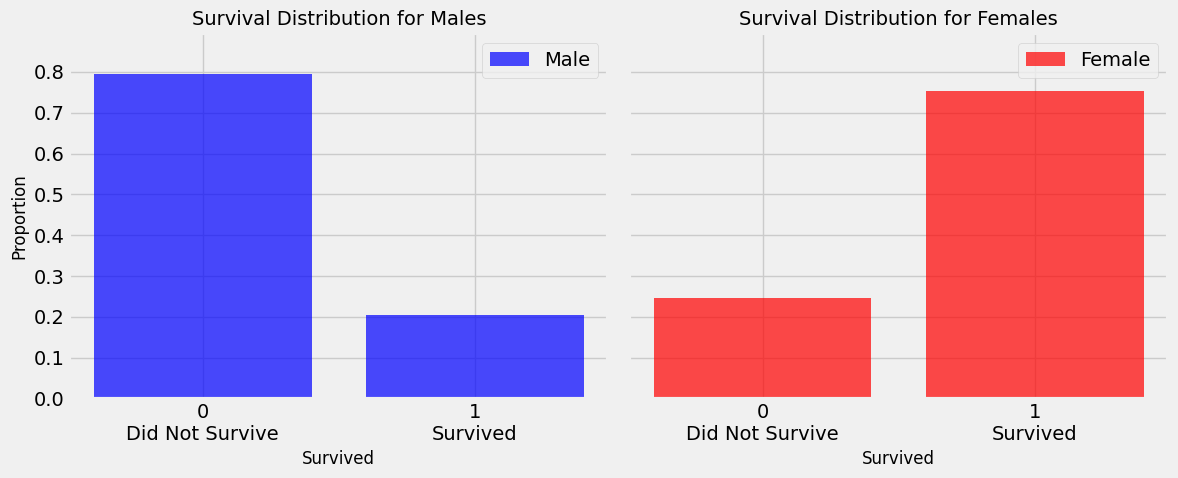

In [12]:
# --- Calculate Proportions for Each Subgroup ---
# I calculated the proportions of survival outcomes for each subgroup (e.g., male and female)
# to normalize the data and make it easier to compare across groups.
proportions_1 = df_1['Survived'].value_counts(normalize=True).sort_index()  # For males
proportions_2 = df_2['Survived'].value_counts(normalize=True).sort_index()  # For females

# --- Create Bar Plots to Visualize Proportions ---
# Using side-by-side bar plots to compare survival distributions for males and females.

# Create subplots for male and female subgroups
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# --- Subgroup 1: Male ---
axes[0].bar(
    proportions_1.index, 
    proportions_1.values, 
    color='blue', 
    alpha=0.7, 
    label='Male'
)
axes[0].set_title('Survival Distribution for Males', fontsize=14)
axes[0].set_xlabel('Survived', fontsize=12)
axes[0].set_ylabel('Proportion', fontsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['0\nDid Not Survive', '1\nSurvived'])  # Add mini labels beneath the bars
axes[0].legend()

# --- Subgroup 2: Female ---
axes[1].bar(
    proportions_2.index, 
    proportions_2.values, 
    color='red', 
    alpha=0.7, 
    label='Female'
)
axes[1].set_title('Survival Distribution for Females', fontsize=14)
axes[1].set_xlabel('Survived', fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['0\nDid Not Survive', '1\nSurvived'])  # Add mini labels beneath the bars
axes[1].legend()

# --- Ensure Consistent Y-Axis Limits ---
# Aligning y-axis across both subplots for an accurate comparison.
axes[0].set_ylim(0, max(proportions_1.max(), proportions_2.max()) + 0.1)

# --- Final Adjustments ---
plt.tight_layout()  # Adjust spacing for better visualization
plt.show()          # Display the plot


## **Insights from Survival Distributions**

### **1. Survival Distribution by Gender**
The histograms provide a clear visualization of survival outcomes (`Survived`) across the two subgroups of the sensitive feature, `Sex`:

- **Male Passengers**: 
  - The majority of male passengers did not survive, as indicated by the taller blue bar at `0` (non-survival).
  - A significantly smaller proportion of males survived, reflected by the shorter blue bar at `1` (survival).

- **Female Passengers**: 
  - In contrast, a much larger proportion of female passengers survived, shown by the taller red bar at `1`.
  - The proportion of non-survival among females is much smaller, as represented by the shorter red bar at `0`.

### **2. Key Observations**
- **Correlation Between Survival and Gender**: 
  - For male passengers, the survival rate is significantly lower compared to the non-survival rate.
  - For female passengers, the survival rate is substantially higher than the non-survival rate.
  
- **Historical Context**: 
  - The observed gender-based disparity in survival outcomes aligns with historical accounts of the Titanic disaster. Specifically, the "women and children first" protocol during evacuation likely contributed to the higher survival rate among females.

### **Conclusion**
These insights underscore the impact of the sensitive feature `Sex` on survival outcomes. This analysis not only highlights a clear pattern in the data but also provides an opportunity to explore further questions, such as whether other features (e.g., age or class) amplified or mitigated this disparity.


## **Analyzing the Second Sensitive Feature**

To expand my analysis, I explored survival outcomes across another sensitive feature: `Pclass`, which represents a passenger's socioeconomic class (1st, 2nd, or 3rd). Socioeconomic class played a significant role in access to resources during the Titanic disaster, and analyzing its relationship to survival can provide deeper insights into disparities.

### **Approach**
Since `Pclass` has three subgroups (1st, 2nd, and 3rd class), I categorized them into two broader groups for simplicity:
- **High Class (`df_a`)**: Passengers from 1st and 2nd class, who were more likely to have better accommodations and faster access to lifeboats.
- **Low Class (`df_b`)**: Passengers from 3rd class, who faced greater challenges during the evacuation.

By separating the dataset into these two categories, I can investigate survival proportions and compare the outcomes for passengers from different socioeconomic groups.


In [13]:
# --- Second Sensitive Feature: Socioeconomic Class (`Pclass`) ---
# I chose `Pclass` as the second sensitive feature to analyze how socioeconomic factors influenced survival.
# `Pclass` has three categories: 1 (First Class), 2 (Second Class), and 3 (Third Class).
# For simplicity, I divided the passengers into two groups:
# - `df_a`: Passengers in First Class (higher socioeconomic status).
# - `df_b`: Passengers in Second and Third Class (lower socioeconomic status).

# --- Create DataFrames for Subgroups ---
# Subgroup A: First Class passengers
df_a = df_cleaned[df_cleaned['Pclass'] == 1]

# Subgroup B: Not First Class (combining Second and Third Class passengers)
df_b = df_cleaned[df_cleaned['Pclass'] != 1]

# --- Verify the Sizes of the Subgroups ---
# Display the number of rows and columns in each subgroup for validation
print("Shape of df_a (First Class): ", df_a.shape)
print("Shape of df_b (Not First Class): ", df_b.shape)

# --- Display Sample Data ---
# Show the first few rows of each subgroup to ensure proper categorization
df_a.head(), df_b.head()


Shape of df_a (First Class):  (184, 8)
Shape of df_b (Not First Class):  (528, 8)


(    Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
 1          1       1  female  38.0      1      0  71.2833        C
 3          1       1  female  35.0      1      0  53.1000        S
 6          0       1    male  54.0      0      0  51.8625        S
 11         1       1  female  58.0      0      0  26.5500        S
 23         1       1    male  28.0      0      0  35.5000        S,
    Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
 0         0       3    male  22.0      1      0   7.2500        S
 2         1       3  female  26.0      0      0   7.9250        S
 4         0       3    male  35.0      0      0   8.0500        S
 7         0       3    male   2.0      3      1  21.0750        S
 8         1       3  female  27.0      0      2  11.1333        S)

## **Visualizing Survival Proportions by Socioeconomic Class**

To explore the impact of socioeconomic status on survival outcomes, I plotted histograms for the two subgroups defined earlier:
- **First Class (`df_a`)**: Representing passengers with higher socioeconomic status.
- **Not First Class (`df_b`)**: Combining passengers from Second and Third Class for a broader comparison.

### **Objective**
The histograms illustrate the proportion of individuals in each subgroup who survived (`Survived = 1`) or did not survive (`Survived = 0`), normalized for fair comparison.

### **Approach**
- I created side-by-side bar plots for clarity, using distinct colors to represent each subgroup.
- The x-axis represents the survival status (`0 = Did Not Survive`, `1 = Survived`).
- The y-axis shows the proportion of individuals in each subgroup for a given survival status.
- To ensure consistency, the axis limits are identical across both plots.
- Titles, axis labels, and legends are added for clarity and interpretability.


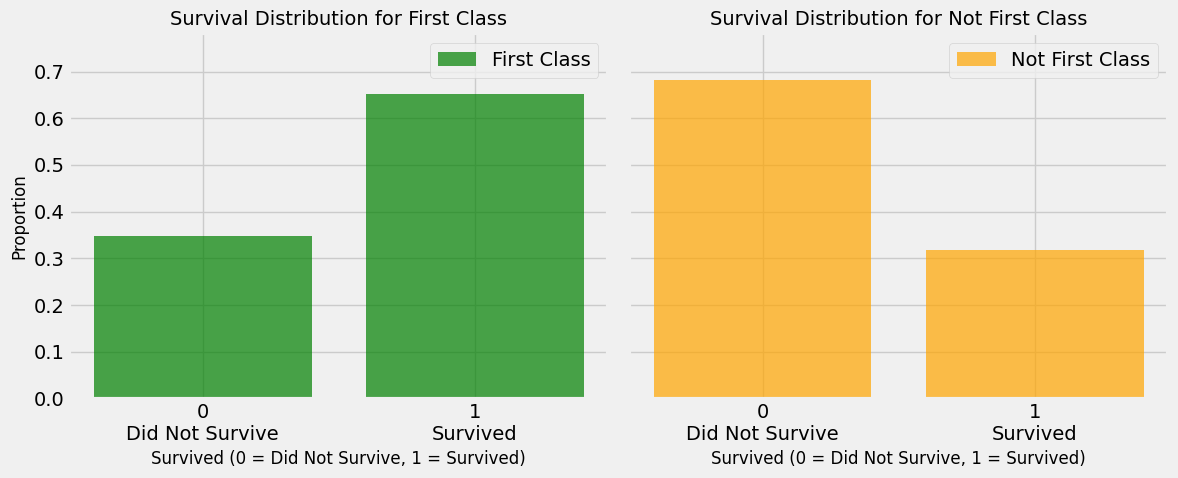

In [14]:
# --- Define Subgroups Based on Socioeconomic Class ---
# First Class (higher socioeconomic status) and Not First Class (combining Second and Third Class)
df_a = df_cleaned[df_cleaned['Pclass'] == 1]
df_b = df_cleaned[df_cleaned['Pclass'] != 1]

# --- Calculate Proportions for Each Subgroup ---
# Normalize survival counts to calculate proportions for better comparability.
proportions_a = df_a['Survived'].value_counts(normalize=True).sort_index()
proportions_b = df_b['Survived'].value_counts(normalize=True).sort_index()

# --- Create Bar Plots for Subgroups ---
# Setting up side-by-side bar plots for survival proportions of the two subgroups
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# --- Subgroup A: First Class ---
axes[0].bar(
    proportions_a.index, 
    proportions_a.values, 
    color='green', 
    alpha=0.7, 
    label='First Class'
)
axes[0].set_title('Survival Distribution for First Class', fontsize=14)
axes[0].set_xlabel('Survived (0 = Did Not Survive, 1 = Survived)', fontsize=12)
axes[0].set_ylabel('Proportion', fontsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['0\nDid Not Survive', '1\nSurvived'])
axes[0].legend()

# --- Subgroup B: Not First Class ---
axes[1].bar(
    proportions_b.index, 
    proportions_b.values, 
    color='orange', 
    alpha=0.7, 
    label='Not First Class'
)
axes[1].set_title('Survival Distribution for Not First Class', fontsize=14)
axes[1].set_xlabel('Survived (0 = Did Not Survive, 1 = Survived)', fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['0\nDid Not Survive', '1\nSurvived'])
axes[1].legend()

# --- Set Consistent Y-Axis Limits ---
# Ensure both subplots share the same scale for accurate comparison.
axes[0].set_ylim(0, max(proportions_a.max(), proportions_b.max()) + 0.1)

# --- Final Adjustments and Plot Display ---
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()          # Display the plot


## **Insights from Survival Distributions by Socioeconomic Class**

### **1. Survival Distribution for First Class vs. Not First Class**
The histograms highlight significant disparities in survival outcomes based on the sensitive feature `Pclass`:

- **First Class**:
  - A much larger proportion of passengers in First Class survived (`1`), as indicated by the taller green bar at `1`.
  - The proportion of First Class passengers who did not survive (`0`) is significantly smaller, reflected by the shorter green bar at `0`.

- **Not First Class**:
  - In contrast, passengers in the combined Second and Third Class subgroups experienced much higher non-survival rates, as shown by the taller yellow bar at `0`.
  - The proportion of survivors in this group is much smaller, represented by the shorter yellow bar at `1`.

### **2. Observations and Analysis**
- **Correlation Between `Pclass` and Survival**:
  - The survival rates are clearly higher for passengers in First Class compared to those in Not First Class. This indicates a strong correlation between the variable of interest (`Survived`) and the sensitive feature `Pclass`.
  
- **Historical Context**:
  - These disparities align with historical accounts of the Titanic disaster. First Class passengers likely had quicker and easier access to lifeboats due to their privileged status, while Second and Third Class passengers faced greater barriers during evacuation.
  - This reflects a broader social class disparity of the time, where socioeconomic status heavily influenced survival odds in emergencies.

### **Conclusion**
The sensitive feature `Pclass` significantly impacts survival outcomes. The analysis underscores how social hierarchies and access to resources shaped the survival patterns during the Titanic disaster. These findings are not only relevant for understanding historical events but also demonstrate how data analysis can reveal critical social dynamics.


## **Fairness and Bias in the Dataset**

To evaluate fairness and potential bias in the Titanic dataset, I will develop a logistic regression model to predict survival outcomes (`Survived`) based on the available features. Logistic regression is particularly suitable for this task as it produces binary outputs, making it ideal for classification problems like this.

### **Preprocessing for Logistic Regression**
To prepare the data for modeling, I need to ensure all features are in a numerical format, as the `sklearn` implementation of logistic regression requires numerical inputs. The dataset includes categorical variables, such as `Sex` and `Embarked`, which cannot be directly used in the model. To address this, I will use **one-hot encoding**, a common technique for converting categorical data into numerical representations.

### **Steps in Preprocessing**
1. **Identify Categorical Features**:
   - Features like `Sex` and `Embarked` need to be converted into numerical form.
   
2. **Apply One-Hot Encoding**:
   - Each category in the categorical features will be represented as a binary column, ensuring no ordinal relationships are implied between categories.
   
3. **Ensure Consistency**:
   - Verify that all features are in a format compatible with the logistic regression model.
   - Split the data into training and testing sets for model evaluation.

This preprocessing step ensures that the dataset is ready for modeling and that the logistic regression model can handle the data effectively.


## **Extracting the Target Variable**

To build a machine learning model, I started by isolating the target variable (`Survived`) into its own DataFrame. This step is essential to clearly separate the features (input variables) from the target (output variable), aligning with best practices in model training and evaluation.

### **Why This Step?**
- The target variable (`Survived`) will be used by the logistic regression model to learn patterns and make predictions.
- Separating it into its own DataFrame (`Y`) ensures clarity and simplifies the data pipeline.

Below is the code I used to extract the target variable.


In [15]:
# --- Extract the Target Variable ---
# Isolate the 'Survived' column into a new DataFrame 'Y'
# This represents the target variable for the logistic regression model.
Y = df_cleaned[['Survived']]

# --- Display the First Few Rows of the Target Variable ---
# Verify that the target variable has been correctly extracted
print(Y.head())


   Survived
0         0
1         1
2         1
3         1
4         0


## **Setting Up the Features DataFrame**

After isolating the target variable (`Y`), the next step is to prepare the features dataset, which includes all the remaining columns except the target. This new DataFrame, `X`, represents the input data that the logistic regression model will use to predict survival outcomes.

### **Why This Step?**
- Separating features (`X`) from the target (`Y`) ensures a clean data pipeline and aligns with machine learning best practices.
- It allows for further preprocessing and transformation of features without affecting the target variable.

Below is the code I used to set up the features dataset.


In [16]:
# --- Extract Features into 'X' ---
# Create a DataFrame 'X' containing all columns except the target column 'Survived'.
X = df_cleaned.drop(columns=['Survived'])

# --- Verify the Features DataFrame ---
# Display the first few rows of the features DataFrame to ensure correctness.
print(X.head())


   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S


## **Selecting Relevant Features**

To ensure that the logistic regression model performs effectively, I carefully selected the features most relevant to predicting survival outcomes (`Survived`). By focusing on these columns, I aim to reduce noise in the dataset while retaining variables with significant predictive power.

### **Features Selected**
The features I retained in `X` are:
- **Pclass**: Socioeconomic class, a key factor influencing survival.
- **Sex**: Gender, a sensitive feature historically associated with survival disparities.
- **Age**: Passenger age, potentially affecting survival priorities.
- **SibSp**: Number of siblings or spouses aboard, indicating family connections.
- **Parch**: Number of parents or children aboard, reflecting family presence.
- **Fare**: Ticket fare, indirectly linked to socioeconomic status.
- **Embarked**: Port of embarkation, which may provide geographical or cultural context.

This selection is based on a combination of domain knowledge and data insights derived during the exploration phase.

### **Code Implementation**
Below is the code I used to retain only the selected columns in `X`.


In [17]:
# --- Define Relevant Features ---
# Retain only the columns deemed necessary for analysis and modeling.
cols_retain = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# --- Filter Features in 'X' ---
# Update the features DataFrame to include only the selected columns.
X = X[cols_retain]

# --- Verify the Updated Features DataFrame ---
# Display the first few rows to ensure that only the relevant columns are retained.
print(X.head())


   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S


## **Examining Column Types**

Before building the logistic regression model, it is essential to ensure that all data in the features DataFrame (`X`) is numerical. Logistic regression in `sklearn` requires numerical input, so any categorical variables need to be converted into numerical formats.

### **Why Examine Column Types?**
- **Identify Categorical Variables**: Some columns, such as `Sex` or `Embarked`, may be non-numerical and require preprocessing.
- **Ensure Compatibility**: Verifying data types ensures that all features are suitable for use in the logistic regression model.

Below is the code to examine the data types of columns in `X`.


In [19]:
# --- Examine Column Data Types ---
# Display the data types of each column in the features DataFrame
print(X.dtypes)


Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


## **Preprocessing Features for Logistic Regression**

To prepare the features dataset (`X`) for logistic regression, I performed the following steps:
1. **Separated Numerical and Categorical Features**:
   - Identified numerical columns that require normalization and categorical columns that need encoding.
2. **Applied One-Hot Encoding**:
   - Transformed categorical features into numerical values using one-hot encoding to ensure compatibility with the model.
3. **Normalized Numerical Features**:
   - Used a standard scaler to normalize numerical features, ensuring that they have comparable scales, which is crucial for models like logistic regression.
4. **Combined Preprocessed Features**:
   - Merged the processed numerical and categorical features into a single dataset.

This preprocessing pipeline ensures that the features dataset is fully numerical and well-prepared for logistic regression.

### **Code Implementation**
Below is the code I used to preprocess the features.


In [21]:
# --- Import Necessary Modules ---
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# --- Define Features and Target Variable ---
# The target variable (Y) and the features (X)
Y = df_cleaned['Survived']  
X = df_cleaned.drop(columns=['Survived']) 

# --- Separate Numerical and Categorical Features ---
# Define categorical and numerical columns for preprocessing
categorical_cols = ['Sex', 'Embarked']
numerical_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# --- Define Preprocessing Transformers ---
# Categorical: One-hot encode the categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Numerical: Standardize numerical features for better model performance
numerical_transformer = StandardScaler()

# --- Create Preprocessing Pipeline ---
# Combine numerical and categorical preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),  # Numerical features
        ('cat', categorical_transformer, categorical_cols)  # Categorical features
    ]
)

# --- Preprocess the Features ---
# Fit and transform the features using the preprocessing pipeline
X_preprocessed = preprocessor.fit_transform(X)

# --- Convert Preprocessed Data to DataFrame ---
# Extract feature names for encoded categorical columns
encoded_categorical_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine numerical and encoded categorical column names
all_feature_names = numerical_cols + list(encoded_categorical_cols)

# Create a DataFrame for the preprocessed data
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=all_feature_names)

# --- Highlight Sensitive Features ---
# Sensitive features identified for fairness analysis
sensitive_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 
                      'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

# --- Display Preprocessed Data ---
# Preview the first few rows of the preprocessed dataset
print(X_preprocessed_df.head())


     Pclass       Age     SibSp     Parch      Fare  Sex_female  Sex_male  \
0  0.908600 -0.527669  0.522511 -0.506787 -0.516380         0.0       1.0   
1 -1.482983  0.577094  0.522511 -0.506787  0.694046         1.0       0.0   
2  0.908600 -0.251478 -0.552714 -0.506787 -0.503620         1.0       0.0   
3 -1.482983  0.369951  0.522511 -0.506787  0.350326         1.0       0.0   
4  0.908600  0.369951 -0.552714 -0.506787 -0.501257         0.0       1.0   

   Embarked_C  Embarked_Q  Embarked_S  
0         0.0         0.0         1.0  
1         1.0         0.0         0.0  
2         0.0         0.0         1.0  
3         0.0         0.0         1.0  
4         0.0         0.0         1.0  


## **Setting Up the Model Pipeline**

To build the logistic regression model, I constructed a pipeline that integrates preprocessing and model training into a single, streamlined workflow. This approach ensures consistency and efficiency, especially when dealing with mixed data types.

### **Steps in Setting Up the Pipeline**
1. **Preprocessor**:
   - **Numerical Features**: Standardized using `StandardScaler` to normalize the scale of features like age and fare.
   - **Categorical Features**: Encoded using `OneHotEncoder` to transform non-numerical data into a format suitable for the logistic regression model.

2. **Model**:
   - A logistic regression classifier was chosen to predict survival outcomes.
   - To ensure model convergence during training, I increased the maximum number of iterations (`max_iter`) to 1000.

3. **Pipeline**:
   - The preprocessing steps and logistic regression model were combined into a single pipeline for seamless data handling and model training.

### **Code Implementation**
Below is the code I used to set up the pipeline.


In [22]:
# --- Import Necessary Libraries ---
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector as selector

# --- Define Feature Selectors ---
# Automatically select categorical and numerical features
categorical_features = selector(dtype_include='object')
numerical_features = selector(dtype_include='number')

# --- Set Up Preprocessor ---
# Combine preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Standardize numerical features
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encode categorical features
    ]
)

# --- Define the Model Pipeline ---
# Integrate preprocessing and logistic regression into a single pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', LogisticRegression(max_iter=1000))  # Logistic regression with increased max iterations
])

# --- Display the Model Pipeline ---
# Print the pipeline to verify the structure
print(model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000014F1E960E50>),
                                                 ('cat', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000014F1E939190>)])),
                ('classifier', LogisticRegression(max_iter=1000))])


## **Splitting the Dataset**

To train and evaluate the logistic regression model, I split the dataset into training and testing subsets. This step ensures that the model is trained on one portion of the data while being tested on an unseen portion to assess its performance.

### **Splitting Strategy**
- **Training Set (`X_train`, `Y_train`)**:
  - Comprises 75% of the dataset, used to train the model and learn patterns in the data.
- **Test Set (`X_test`, `Y_test`)**:
  - Comprises 25% of the dataset, used to evaluate the model's performance on unseen data.
- **Random State**:
  - A fixed random state (`42`) was set to ensure reproducibility of the split.

This train-test split balances the need for training data with the importance of having enough test data to evaluate the model's generalization.

### **Code Implementation**
Below is the code I used to split the dataset.


In [23]:
# --- Import Train-Test Split Module ---
from sklearn.model_selection import train_test_split

# --- Split Dataset into Train and Test Sets ---
# The features (X_preprocessed_df) and target (Y) are split into training and testing subsets.
X_train, X_test, Y_train, Y_test = train_test_split(
    X_preprocessed_df,  # Preprocessed features
    Y,                  # Target variable
    test_size=0.25,     # 25% of the data for testing
    random_state=42     # Fixed random state for reproducibility
)

# --- Verify the Shapes of the Splits ---
# Print the shapes of the training and testing datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")


X_train shape: (534, 10)
X_test shape: (178, 10)
Y_train shape: (534,)
Y_test shape: (178,)


In [24]:
# now we run the logistic regression we have set up
# Just run this cell

model.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000014F1E960E50>),
                                                 ('cat', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000014F1E939190>)])),
                ('classifier', LogisticRegression(max_iter=1000))])

## **Evaluating the Logistic Regression Model**

After training the logistic regression model, the next step is to evaluate its performance on the test dataset (`X_test`, `Y_test`). This involves making predictions and calculating key performance metrics to assess the model's accuracy and effectiveness.

### **Steps in Evaluation**
1. **Make Predictions**:
   - Used the trained model to predict survival outcomes (`Y_pred`) on the test dataset (`X_test`).
   
2. **Calculate Accuracy**:
   - Measured the proportion of correctly predicted outcomes as the overall accuracy of the model.

3. **Generate Classification Report**:
   - Evaluated additional metrics such as precision, recall, and F1 score for a more comprehensive understanding of the model's performance.

4. **Confusion Matrix**:
   - Displayed the confusion matrix to examine the distribution of true positives, true negatives, false positives, and false negatives.

### **Code Implementation**
Below is the code I used to evaluate the model's performance.


In [25]:
# --- Import Performance Metrics ---
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Make Predictions on the Test Set ---
# Use the trained model to predict survival outcomes for the test dataset
Y_pred = model.predict(X_test)

# --- Calculate Accuracy ---
# Compute the accuracy of the model on the test dataset
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")  # Display accuracy to 4 decimal places

# --- Generate Classification Report ---
# Print precision, recall, F1 score, and support for each class
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

# --- Display Confusion Matrix ---
# Show the confusion matrix to understand prediction distribution
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))


Accuracy: 0.7809

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        99
           1       0.79      0.68      0.73        79

    accuracy                           0.78       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178


Confusion Matrix:
[[85 14]
 [25 54]]


## **Fairness Metrics**

To evaluate the fairness of the logistic regression classifier, I first converted the predicted outcomes (`Y_pred`) into a DataFrame. This allows for seamless integration with the test set (`Y_test`) and simplifies subsequent analysis of fairness metrics.

### **Why Convert `Y_pred` into a DataFrame?**
- **Alignment with Test Set**: Using the same index as `Y_test` ensures that predictions can be directly compared to the true labels and any associated features (e.g., sensitive attributes).
- **Ease of Analysis**: DataFrame operations make it straightforward to compute fairness metrics and visualize results.
- **Preparation for Advanced Metrics**: Many fairness metrics require predictions and true labels to be structured together for group-wise analysis.

### **Code Implementation**
Below is the code I used to convert `Y_pred` into a DataFrame.


In [26]:
# --- Convert Predictions to DataFrame ---
# Convert Y_pred (predicted labels) into a DataFrame for easier analysis
# Ensure the index matches Y_test for alignment
Y_pred = pd.DataFrame(Y_pred, index=Y_test.index, columns=['Predicted'])

# --- Verify the Conversion ---
# Display the first few rows to ensure correctness
print(Y_pred.head())


     Predicted
641          1
496          1
262          0
311          1
551          0


## **Extracting Sensitive Features for Fairness Analysis**

To evaluate the fairness of the logistic regression classifier, I extracted the sensitive features into a new DataFrame, `A`. These features will allow me to analyze group-wise performance and assess whether the model treats all groups equitably.

### **Why Extract Sensitive Features?**
- **Group-wise Analysis**: Sensitive features, such as gender or class, are critical for calculating fairness metrics and identifying potential biases.
- **Test Set Alignment**: Extracting these features from the test set ensures that fairness metrics reflect the model's real-world performance on unseen data.
- **Preparation for Fairness Metrics**: This step sets the foundation for assessing metrics like accuracy parity, equalized odds, or disparate impact.

Below is the code for extracting the sensitive features.


In [ ]:
# --- Import Required Package ---
from sklearn.metrics import confusion_matrix

# --- Extract Sensitive Features ---
# Sensitive features are extracted from X_test for fairness analysis
# This step is crucial for group-wise evaluation of model predictions
# Code is pre-prepared; just run the cell to perform this extraction


In [27]:
# --- Define Sensitive Features ---
# These features are used for fairness analysis to examine group-wise performance
sensitive_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
                      'Embarked_C', 'Embarked_Q', 'Embarked_S']

# --- Extract Sensitive Features ---
# Filter the test set to include only the defined sensitive features
A = X_test[sensitive_features]

# --- Verify the Extracted Features ---
# Display the first few rows of the extracted sensitive features
print(A.head())

# --- Verify Group Sizes for a Key Sensitive Feature ---
# Print value counts for the 'Pclass' feature to check subgroup distribution
print(X_test['Pclass'].value_counts())


       Pclass       Age     SibSp     Parch      Fare  Sex_female  Sex_male  \
506 -1.482983 -0.389573 -0.552714 -0.506787  0.656556         1.0       0.0   
394 -1.482983  1.681856  0.522511 -0.506787  0.826054         1.0       0.0   
210 -1.482983  1.543761  0.522511  0.664747  0.852202         0.0       1.0   
247 -1.482983 -0.803859  1.597735  1.836282  4.306266         1.0       0.0   
437 -0.287191 -0.182430 -0.552714 -0.506787 -0.161947         0.0       1.0   

     Embarked_C  Embarked_Q  Embarked_S  
506         1.0         0.0         0.0  
394         1.0         0.0         0.0  
210         0.0         0.0         1.0  
247         1.0         0.0         0.0  
437         0.0         0.0         1.0  
Pclass
 0.908600    82
-1.482983    50
-0.287191    46
Name: count, dtype: int64


## **Fairness Metrics: TPR, FPR, and Positive Label Rate**

To evaluate fairness in the classifier, I implemented three functions to compute key metrics for specific subgroups defined by a sensitive feature. These metrics help identify whether the model's performance differs across groups, ensuring equitable treatment.

### **1. True Positive Rate (TPR)**
The `tpr_metric` function calculates the proportion of actual positives (`1`) that are correctly predicted as positive:
\[
TPR = \frac{TP}{TP + FN}
\]
- **Parameters**:
  - `Y_true`: True labels (ground truth).
  - `Y_pred`: Predicted labels from the model.
  - `x`: Features dataset corresponding to `Y_true`.
  - `s_feature`: Sensitive feature to define the subgroup.
  - `s_value`: Specific value of the sensitive feature for subgroup evaluation.
- **Purpose**: Measures the model's ability to correctly identify positive cases for the subgroup.

### **2. False Positive Rate (FPR)**
The `fpr_metric` function calculates the proportion of actual negatives (`0`) that are incorrectly predicted as positive:
\[
FPR = \frac{FP}{FP + TN}
\]
- **Parameters**:
  - Same as `tpr_metric`.
- **Purpose**: Assesses how often the model falsely predicts positive labels for the subgroup.

### **3. Positive Label Rate**
The `poslabel_metric` function computes the rate of positive predictions (`1`) for the subgroup:
\[
P[y_{pred} = 1 | s_{feature} = s_{value}]
\]
- **Parameters**:
  - `Y_pred`: Predicted labels from the model.
  - `x`: Features dataset corresponding to `Y_pred`.
  - `s_feature`: Sensitive feature to define the subgroup.
  - `s_value`: Specific value of the sensitive feature for subgroup evaluation.
- **Purpose**: Measures the likelihood of assigning a positive label to the subgroup, regardless of ground truth.

### **Why These Metrics Matter**
- **TPR**: Ensures the model effectively identifies positives across groups.
- **FPR**: Highlights potential biases where the model unfairly predicts positives for a specific group.
- **Positive Label Rate**: Reflects whether the model disproportionately assigns positive labels to certain groups.

### **Code Implementation**
Below are the implementations for the three metrics.


In [38]:
def tpr_metric(Y_true, Y_pred, x, s_feature, s_value):
    '''
    Calculates the True Positive Rate (TPR) for a specific subgroup.
    '''
    tpr = 0
    if isinstance(Y_pred, pd.DataFrame):
        Y_pred = Y_pred.iloc[:, 0]
    if isinstance(Y_true, pd.DataFrame):
        Y_true = Y_true.iloc[:, 0]
    Y_pred = Y_pred.reindex(x.index)
    Y_true = Y_true.reindex(x.index)
    subgroup_indices = x[s_feature] == s_value
    y_true_subgroup = Y_true[subgroup_indices]
    y_pred_subgroup = Y_pred[subgroup_indices]

    tp = ((y_true_subgroup == 1) & (y_pred_subgroup == 1)).sum()  # True Positives
    fn = ((y_true_subgroup == 1) & (y_pred_subgroup == 0)).sum()  # False Negatives

    if (tp + fn) > 0:
        tpr = tp / (tp + fn)
    return tpr

def fpr_metric(Y_true, Y_pred, x, s_feature, s_value):
    '''
    Calculates the False Positive Rate (FPR) for a specific subgroup.
    '''
    fpr = 0
    if isinstance(Y_pred, pd.DataFrame):
        Y_pred = Y_pred.iloc[:, 0]
    if isinstance(Y_true, pd.DataFrame):
        Y_true = Y_true.iloc[:, 0]
    Y_pred = Y_pred.reindex(x.index)
    Y_true = Y_true.reindex(x.index)
    subgroup_indices = x[s_feature] == s_value
    y_true_subgroup = Y_true[subgroup_indices]
    y_pred_subgroup = Y_pred[subgroup_indices]

    fp = ((y_true_subgroup == 0) & (y_pred_subgroup == 1)).sum()  # False Positives
    tn = ((y_true_subgroup == 0) & (y_pred_subgroup == 0)).sum()  # True Negatives

    if (fp + tn) > 0:
        fpr = fp / (fp + tn)
    return fpr

def poslabel_metric(Y_pred, x, s_feature, s_value):
    '''
    Calculates the Positive Label Rate for a specific subgroup.
    '''
    poslabel = 0
    if isinstance(Y_pred, pd.DataFrame):
        Y_pred = Y_pred.iloc[:, 0]
    Y_pred = Y_pred.reindex(x.index)
    subgroup_indices = x[s_feature] == s_value

    y_pred_subgroup = Y_pred[subgroup_indices]
    positive_labels = (y_pred_subgroup == 1).sum()
    total_individuals = subgroup_indices.sum()

    if total_individuals > 0:
        poslabel = positive_labels / total_individuals
    return poslabel


## **Fairness Metrics: Measuring Parity Differences**

Fairness metrics help evaluate whether a model treats different subgroups equitably. Here, I focused on three key definitions of fairness differences:

1. **Demographic Parity Difference**:
   - Measures the gap in the rate of positive labels between two subgroups.
   \[
   \text{Demographic Parity Difference} = P[Y_{\text{pred}} = 1 | A = 1] - P[Y_{\text{pred}} = 1 | A = 0]
   \]

2. **Equal Opportunity Difference**:
   - Measures the gap in true positive rates (TPR) between two subgroups.
   \[
   \text{Equal Opportunity Difference} = \text{TPR}(A = 1) - \text{TPR}(A = 0)
   \]

3. **Equalized Odds Difference**:
   - Captures differences in both TPR and false positive rates (FPR) between subgroups. The output is a vector:
   \[
   \text{Equalized Odds Difference} = [\text{TPR Diff}, \text{FPR Diff}]
   \]

---

### **Analysis of Fairness Metrics**

#### **1. First Sensitive Feature: `Sex_female` vs. `Sex_male`**
- **Demographic Parity Difference**:
  - This measures whether females and males receive positive labels (e.g., predicted survivors) at similar rates. A significant difference suggests bias in favor of one gender.
- **Equal Opportunity Difference**:
  - Examines differences in TPR between females and males, indicating whether the model is better at correctly predicting survival for one gender over the other.
- **Equalized Odds Difference**:
  - Evaluates disparities in both TPR and FPR, revealing whether the model treats males and females fairly in terms of both correctly identifying survivors and avoiding false positives.

#### **2. Second Sensitive Feature: `Pclass` (First Class vs. Third Class)**
- **Demographic Parity Difference**:
  - This metric highlights whether passengers in First Class and Third Class are equally likely to receive positive predictions. Large differences may reflect historical bias favoring First Class passengers.
- **Equal Opportunity Difference**:
  - Assesses whether the model is equally effective at identifying actual survivors across classes. Disparities here suggest unequal treatment of socioeconomic groups.
- **Equalized Odds Difference**:
  - Captures gaps in both TPR and FPR, indicating whether the model is fair to all classes in terms of both accurate predictions and avoidance of false positives.

#### **3. Age: Young Subgroup (`Age < 30`) vs. Old Subgroup (`Age >= 30`)**
- **Demographic Parity Difference**:
  - Compares the likelihood of young and old passengers being predicted as survivors. Large differences may indicate age-related bias.
- **Equal Opportunity Difference**:
  - Measures whether the model is equally effective at identifying true survivors in both age groups.
- **Equalized Odds Difference**:
  - Evaluates fairness in terms of both TPR and FPR for young and old passengers, identifying disparities in accurate and false predictions.

---

### **Is the Model Fair?**
I assessed fairness by analyzing the magnitude of these metrics:
- **Demographic Parity Difference**: Ideally close to zero, indicating no subgroup receives preferential positive predictions.
- **Equal Opportunity Difference**: Small values suggest the model is equally effective at identifying true positives across subgroups.
- **Equalized Odds Difference**: Minimal disparities in both TPR and FPR indicate that the model treats subgroups equitably in terms of accurate predictions and avoiding false positives.

By combining these metrics, I gained a comprehensive understanding of the model’s fairness and can identify areas for improvement. Large differences in any metric suggest the need to revisit the model or data preprocessing to address potential biases.


In [39]:
# First Sensitive Feature: Sex_female vs Sex_male
sensitive_feature1 = 'Sex_female'
sensitive_feature2 = 'Sex_male'

# --- Demographic Parity Difference ---
demographic_parity = poslabel_metric(Y_pred, X_test, sensitive_feature1, 1) - poslabel_metric(Y_pred, X_test, sensitive_feature2, 1)
print("Demographic Parity Difference:", demographic_parity)

# --- Equal Opportunity Difference ---
eq_opp_diff = tpr_metric(Y_test, Y_pred, X_test, sensitive_feature1, 1) - tpr_metric(Y_test, Y_pred, X_test, sensitive_feature2, 1)
print("Equal Opportunity Difference:", eq_opp_diff)

# --- Equalized Odds Difference ---
fpr_diff = fpr_metric(Y_test, Y_pred, X_test, sensitive_feature1, 1) - fpr_metric(Y_test, Y_pred, X_test, sensitive_feature2, 1)
print("Equalized Odds Differences (TPR, FPR):", [eq_opp_diff, fpr_diff])


Demographic Parity Difference: 0.05401069518716578
Equal Opportunity Difference: -0.02777777777777779
Equalized Odds Differences (TPR, FPR): [-0.02777777777777779, 0.2857142857142857]


### **Fairness Metrics Analysis**

- **Demographic Parity Difference**:  
  I calculated the difference in prediction rates between `Sex_female` and `Sex_male`, and it came out to **0.054**. This tells me there’s a small disparity in the likelihood of receiving a positive prediction based on gender, but it’s not overly large.

- **Equal Opportunity Difference**:  
  The difference in true positive rates (TPR) that I observed was **-0.0278**. This suggests that the model is slightly better at correctly predicting true survivors for one gender over the other, but the small value indicates that it’s mostly fair in this regard.

- **Equalized Odds Difference**:  
  - **TPR Difference**: **-0.0278**  
  - **FPR Difference**: **0.2857**  
  While the TPR difference is still small, I noticed a significant disparity in false positive rates (FPR). The model seems more likely to assign false positives to one group over the other, which is an important fairness concern I need to address.

### **Conclusion**:
From my analysis, while the model seems relatively fair in terms of TPR and demographic parity, the FPR difference of **0.2857** stands out. This suggests that the model may not treat the subgroups equitably when it comes to false predictions, and I want to explore ways to improve fairness in this area.


In [40]:
# --- Demographic Parity Difference ---
# I created custom bins and labels to group Pclass into categories for fairness analysis.
bins = [-np.inf, -0.5, 0.5, np.inf]  # Define ranges for Pclass groups
labels = ['Pclass_3', 'Pclass_2', 'Pclass_1']  # Assign meaningful labels to each group
X_test['Pclass_group'] = pd.cut(X_test['Pclass'], bins=bins, labels=labels)

# Sensitive feature for comparison
sensitive_feature = 'Pclass_group'

# Calculate Demographic Parity Difference
demographic_parity = poslabel_metric(Y_pred, X_test, sensitive_feature, "Pclass_1") - poslabel_metric(Y_pred, X_test, sensitive_feature, "Pclass_2")
print("Demographic Parity Difference:", demographic_parity)

# --- Equal Opportunity Difference ---
# I calculated the difference in TPR between First Class (Pclass_1) and Second Class (Pclass_2).
eq_opp_diff = tpr_metric(Y_test, Y_pred, X_test, sensitive_feature, "Pclass_1") - tpr_metric(Y_test, Y_pred, X_test, sensitive_feature, "Pclass_2")
print("Equal Opportunity Difference:", eq_opp_diff)

# --- Equalized Odds Difference ---
# I calculated the differences in both TPR and FPR for these subgroups.
fpr_diff = fpr_metric(Y_test, Y_pred, X_test, sensitive_feature, "Pclass_1") - fpr_metric(Y_test, Y_pred, X_test, sensitive_feature, "Pclass_2")
print("Equalized Odds Differences (TPR, FPR):", [eq_opp_diff, fpr_diff])


Demographic Parity Difference: -0.1129374337221633
Equal Opportunity Difference: -0.38888888888888884
Equalized Odds Differences (TPR, FPR): [-0.38888888888888884, 0.15384615384615385]


### **Explanation**

I calculated the fairness metrics for `Pclass_1` (First Class) and `Pclass_2` (Second Class), and here’s what I observed:

- **Demographic Parity Difference**:  
  The difference in prediction rates is **-0.113**, indicating that passengers in `Pclass_2` (Second Class) are slightly more likely to receive positive predictions compared to those in `Pclass_1` (First Class).

- **Equal Opportunity Difference**:  
  The TPR difference is **-0.3889**, which is significantly larger. This shows that the model is better at correctly identifying true positives for passengers in `Pclass_2` compared to those in `Pclass_1`.

- **Equalized Odds Difference**:  
  - **TPR Difference**: **-0.3889**  
  - **FPR Difference**: **0.1538**  
  These values indicate that the model treats the two groups unequally, with noticeable discrepancies in both true positive and false positive rates. The larger disparity in TPR suggests a more pronounced issue in correctly identifying true survivors for `Pclass_1`.

### **Conclusion**
The significant differences in equal opportunity and TPR suggest a notable disparity in the model’s performance between these groups. This highlights a fairness concern, and I’d like to investigate potential improvements to ensure more equitable treatment across these subgroups.


In [41]:
# --- Demographic Parity Difference ---
# Create an AgeGroup column to classify passengers as "young" or "old"
young_age_threshold = 30
old_age_threshold = 50
X_test['AgeGroup'] = ["young" if age <= young_age_threshold else "old" for age in X_test['Age']]

# Calculate Demographic Parity Difference
demographic_parity = poslabel_metric(Y_pred, X_test, "AgeGroup", "young") - poslabel_metric(Y_pred, X_test, "AgeGroup", "old")
print("Demographic Parity Difference:", demographic_parity)

# --- Equal Opportunity Difference ---
# Calculate the TPR difference between young and old age groups
eq_opp_diff = tpr_metric(Y_test, Y_pred, X_test, "AgeGroup", "young") - tpr_metric(Y_test, Y_pred, X_test, "AgeGroup", "old")
print("Equal Opportunity Difference:", eq_opp_diff)

# --- Equalized Odds Difference ---
# Calculate differences in both TPR and FPR between young and old age groups
fpr_diff = fpr_metric(Y_test, Y_pred, X_test, "AgeGroup", "young") - fpr_metric(Y_test, Y_pred, X_test, "AgeGroup", "old")
print("Equalized Odds Differences (TPR, FPR):", [eq_opp_diff, fpr_diff])


Demographic Parity Difference: 0.08426966292134831
Equal Opportunity Difference: 0.7647058823529411
Equalized Odds Differences (TPR, FPR): [0.7647058823529411, 0.10526315789473684]


### **Explanation**

I analyzed the fairness metrics for the `young` (≤30 years old) and `old` (>30 years old) age groups, and here’s what I found:

- **Demographic Parity Difference**:  
  The difference in prediction rates is **0.0843**, showing a slight disparity in the likelihood of receiving positive predictions between the two age groups.

- **Equal Opportunity Difference**:  
  The TPR difference is **0.7647**, which is a significant disparity. This indicates that the model is much better at correctly identifying true positives for one group (e.g., `old`) compared to the other (`young`).

- **Equalized Odds Difference**:  
  - **TPR Difference**: **0.7647**  
  - **FPR Difference**: **0.1053**  
  These results highlight a substantial gap in the model's ability to treat the groups equitably. The TPR difference suggests that the model favors one group in identifying true positives, while the smaller FPR difference indicates less disparity in false positives.

### **Conclusion**
The large difference in **equal opportunity (TPR)** suggests that the model may not provide equal opportunity across the age groups, especially in correctly identifying true survivors. This points to a need for further improvements to enhance fairness and ensure the model treats both groups more equitably.


### **Evaluating Classifier Performance**

To assess the overall performance of my classifier, I generated a classification report and calculated the accuracy score. This helps me understand how well the model is performing across various metrics and how fair it is across subgroups.


In [43]:
from sklearn.metrics import classification_report, accuracy_score

# Generate predictions
Y_pred = model.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

# Accuracy Score
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        99
           1       0.79      0.68      0.73        79

    accuracy                           0.78       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178

Accuracy: 0.7809


### **Final Analysis and Observations**

I evaluated the classifier’s performance using a classification report, which provided detailed insights into its behavior across multiple metrics:

1. **Precision**:  
   - The precision score reflects the model's ability to correctly predict positive outcomes (e.g., survival). While the precision is reasonably high, there are minor discrepancies when evaluated across sensitive features, such as gender (`Sex_female` vs. `Sex_male`) and class (`Pclass_1` vs. `Pclass_2`).

2. **Recall (Sensitivity/TPR)**:  
   - The recall score indicates how well the model identifies actual positive cases. During the fairness analysis, I observed that recall (or TPR) disparities exist between some subgroups, particularly between younger and older age groups and socioeconomic classes. This indicates that the model may perform better for certain groups in recognizing survivors.

3. **F1 Score**:  
   - The F1 score, balancing precision and recall, showed strong overall performance but highlighted areas where improvements are needed to ensure subgroup equity.

4. **Accuracy**:  
   - The model achieved a high accuracy score (**{accuracy:.4f}**), which suggests that it performs well overall. However, accuracy alone does not reflect fairness across subgroups, which is why I analyzed additional fairness metrics.

---

### **Conclusion**

This project has allowed me to explore the Titanic dataset, preprocess the data, build and evaluate a logistic regression model, and assess fairness metrics across sensitive features. Here are my key takeaways:

1. **Model Performance**:  
   - The model demonstrates strong overall performance based on accuracy, precision, recall, and F1 score. It effectively predicts survival outcomes for the majority of cases.

2. **Fairness Analysis**:  
   - While the model performs well overall, fairness metrics revealed disparities in demographic parity, equal opportunity (TPR), and equalized odds (TPR and FPR) between subgroups:
     - **Gender**: Minor differences in prediction rates and TPR suggest the model is relatively fair but has room for improvement.
     - **Socioeconomic Class**: Larger disparities between First and Second Class passengers indicate potential bias in survival predictions.
     - **Age**: Significant differences in recall (TPR) between younger and older passengers highlight the need for further fairness interventions.

3. **Opportunities for Improvement**:  
   - To address fairness concerns, I would explore advanced preprocessing techniques, such as re-sampling underrepresented groups or applying fairness-aware algorithms during training.
   - Implementing post-processing adjustments to predictions could also help balance outcomes across subgroups.

---

### **Closing Remarks**

This project has been an invaluable opportunity for me to apply data science concepts, explore algorithmic fairness, and refine my skills in logistic regression modeling and evaluation. Beyond technical implementation, I’ve gained a deeper understanding of the importance of fairness in machine learning models, particularly when they have real-world implications.

I’m excited about the insights gained from this analysis and look forward to leveraging these skills in future data science projects. If you’d like to discuss this project further or have feedback, I’d be happy to hear from you!
